In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus'
dme_path = os.path.join(dataset_path, 'fundus_DME')
dr_path = os.path.join(dataset_path, 'fundus_DR')
healthy_path = os.path.join(dataset_path, 'fundus_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the multi-scale attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(512, (3, 3), activation='relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=x)

# Compile the model

# Train the model
batch_size = 32
epochs = 20
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size), epochs=epochs)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


RuntimeError: ignored

Epoch 1/10
39/39 [==============================] - 29s 509ms/step - loss: 1.5359 - accuracy: 0.6950 - val_loss: 0.3959 - val_accuracy: 0.8613
Epoch 2/10
39/39 [==============================] - 19s 483ms/step - loss: 0.4480 - accuracy: 0.8536 - val_loss: 0.3536 - val_accuracy: 0.9000
Epoch 3/10
39/39 [==============================] - 18s 467ms/step - loss: 0.3777 - accuracy: 0.8706 - val_loss: 0.2371 - val_accuracy: 0.9065
Epoch 4/10
39/39 [==============================] - 18s 466ms/step - loss: 0.3419 - accuracy: 0.8778 - val_loss: 0.3308 - val_accuracy: 0.9032
Epoch 5/10
39/39 [==============================] - 19s 482ms/step - loss: 0.3355 - accuracy: 0.8786 - val_loss: 0.2399 - val_accuracy: 0.9065
Epoch 6/10
39/39 [==============================] - 18s 464ms/step - loss: 0.3361 - accuracy: 0.8697 - val_loss: 0.2718 - val_accuracy: 0.8935
Epoch 7/10
39/39 [==============================] - 20s 501ms/step - loss: 0.3516 - accuracy: 0.8706 - val_loss: 0.2483 - val_accuracy: 0.9032

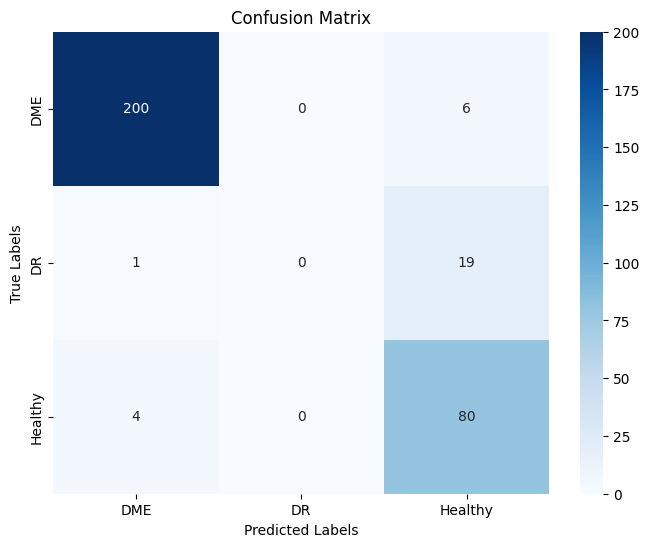

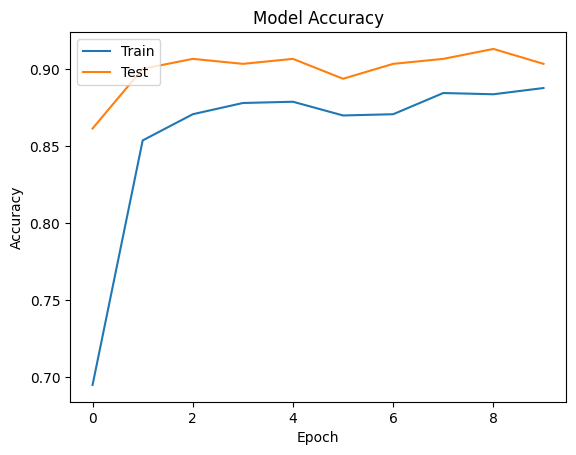

              precision    recall  f1-score   support

         DME       0.98      0.97      0.97       206
          DR       0.00      0.00      0.00        20
     Healthy       0.76      0.95      0.85        84

    accuracy                           0.90       310
   macro avg       0.58      0.64      0.61       310
weighted avg       0.85      0.90      0.88       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus'
dme_path = os.path.join(dataset_path, 'fundus_DME')
dr_path = os.path.join(dataset_path, 'fundus_DR')
healthy_path = os.path.join(dataset_path, 'fundus_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the multi-scale attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x_before_pooling = Conv2D(512, (3, 3), activation='relu')(x)
attention = GlobalAveragePooling2D()(x_before_pooling)
attention = Dense(256)(attention)
attention = Activation('relu')(attention)
attention = Dense(1)(attention)
attention = Activation('softmax')(attention)
attention = Flatten()(attention)
attention = Multiply()([x_before_pooling, attention])

# Create the model
x = GlobalAveragePooling2D()(attention)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus'
dme_path = os.path.join(dataset_path, 'fundus_DME')
dr_path = os.path.join(dataset_path, 'fundus_DR')
healthy_path = os.path.join(dataset_path, 'fundus_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the multi-scale attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x_before_pooling = Conv2D(512, (3, 3), activation='relu')(x)
attention = GlobalAveragePooling2D()(x_before_pooling)
attention = Dense(256)(attention)
attention = Activation('relu')(attention)
attention = Dense(1)(attention)
attention = Activation('softmax')(attention)
attention = Flatten()(attention)
attention = Multiply()([x_before_pooling, attention])

# Create the model
x = GlobalAveragePooling2D()(attention)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 20
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/OCT-AND-EYE-FUNDUS-DATASET-main/fundus/fundus_DME'

Epoch 1/10
39/39 [==============================] - 21s 462ms/step - loss: 651.0485 - accuracy: 0.6472 - val_loss: 0.8060 - val_accuracy: 0.6645
Epoch 2/10
39/39 [==============================] - 18s 470ms/step - loss: 0.7837 - accuracy: 0.6853 - val_loss: 0.8064 - val_accuracy: 0.6645
Epoch 3/10
39/39 [==============================] - 18s 467ms/step - loss: 0.7832 - accuracy: 0.6853 - val_loss: 0.8056 - val_accuracy: 0.6645
Epoch 4/10
39/39 [==============================] - 18s 453ms/step - loss: 0.7817 - accuracy: 0.6853 - val_loss: 0.8100 - val_accuracy: 0.6645
Epoch 5/10
39/39 [==============================] - 18s 453ms/step - loss: 0.7837 - accuracy: 0.6853 - val_loss: 0.8037 - val_accuracy: 0.6645
Epoch 6/10
39/39 [==============================] - 19s 494ms/step - loss: 0.7812 - accuracy: 0.6853 - val_loss: 0.8119 - val_accuracy: 0.6645
Epoch 7/10
39/39 [==============================] - 18s 454ms/step - loss: 0.7826 - accuracy: 0.6853 - val_loss: 0.8172 - val_accuracy: 0.66

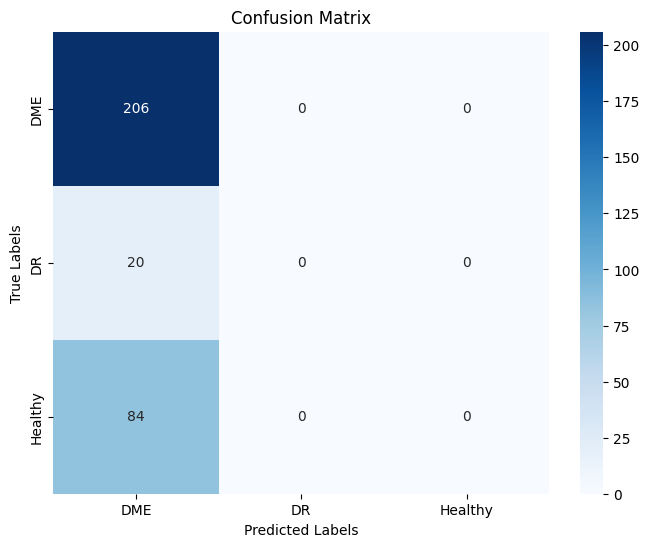

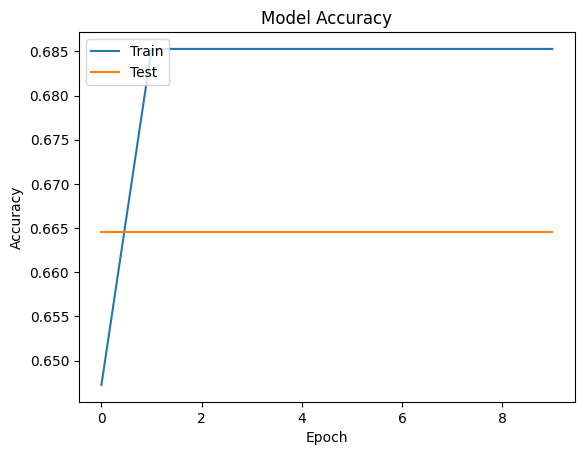

              precision    recall  f1-score   support

         DME       0.66      1.00      0.80       206
          DR       0.00      0.00      0.00        20
     Healthy       0.00      0.00      0.00        84

    accuracy                           0.66       310
   macro avg       0.22      0.33      0.27       310
weighted avg       0.44      0.66      0.53       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/OCT-AND-EYE-FUNDUS-DATASET-main/fundus'
dme_path = os.path.join(dataset_path, 'fundus_DME')
dr_path = os.path.join(dataset_path, 'fundus_DR')
healthy_path = os.path.join(dataset_path, 'fundus_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the multi-scale attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x_before_pooling = Conv2D(512, (3, 3), activation='relu')(x)
attention = GlobalAveragePooling2D()(x_before_pooling)
attention = Dense(256)(attention)
attention = Activation('relu')(attention)
attention = Dense(1)(attention)
attention = Activation('softmax')(attention)
attention = Flatten()(attention)
attention = Multiply()([x_before_pooling, attention])

# Create the model
x = GlobalAveragePooling2D()(attention)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)


Epoch 1/20
39/39 [==============================] - 31s 537ms/step - loss: 1675.4342 - accuracy: 0.6278 - val_loss: 0.8440 - val_accuracy: 0.6645
Epoch 2/20
39/39 [==============================] - 21s 553ms/step - loss: 0.7840 - accuracy: 0.6853 - val_loss: 0.7722 - val_accuracy: 0.6645
Epoch 3/20
39/39 [==============================] - 19s 483ms/step - loss: 0.6427 - accuracy: 0.7201 - val_loss: 9.1537 - val_accuracy: 0.7581
Epoch 4/20
39/39 [==============================] - 20s 526ms/step - loss: 0.9990 - accuracy: 0.6610 - val_loss: 0.9023 - val_accuracy: 0.3419
Epoch 5/20
39/39 [==============================] - 19s 479ms/step - loss: 0.5443 - accuracy: 0.7856 - val_loss: 0.7416 - val_accuracy: 0.6484
Epoch 6/20
39/39 [==============================] - 19s 495ms/step - loss: 0.5357 - accuracy: 0.7896 - val_loss: 0.8321 - val_accuracy: 0.4742
Epoch 7/20
39/39 [==============================] - 19s 489ms/step - loss: 0.5494 - accuracy: 0.7848 - val_loss: 0.5244 - val_accuracy: 0.8

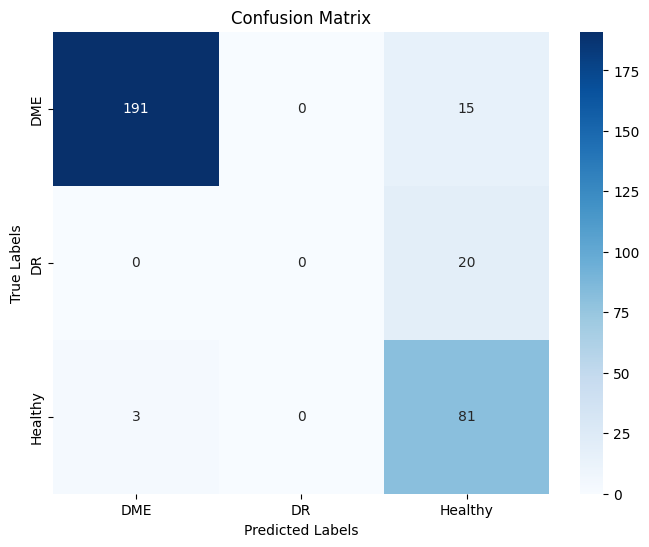

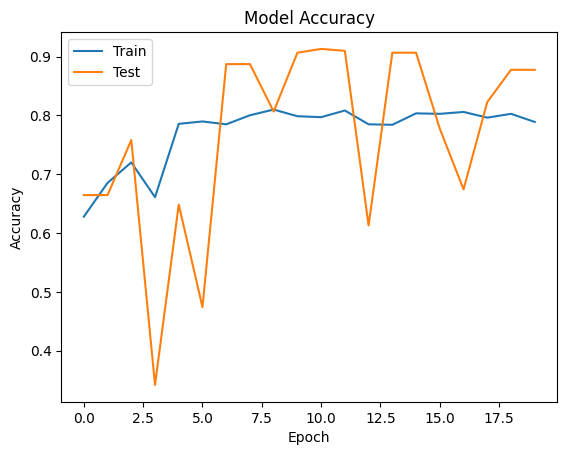

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         DME       0.98      0.93      0.96       206
          DR       0.00      0.00      0.00        20
     Healthy       0.70      0.96      0.81        84

    accuracy                           0.88       310
   macro avg       0.56      0.63      0.59       310
weighted avg       0.84      0.88      0.85       310



In [ ]:

import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus'
dme_path = os.path.join(dataset_path, 'fundus_DME')
dr_path = os.path.join(dataset_path, 'fundus_DR')
healthy_path = os.path.join(dataset_path, 'fundus_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the multi-scale attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x_before_pooling = Conv2D(512, (3, 3), activation='relu')(x)
attention = GlobalAveragePooling2D()(x_before_pooling)
attention = Dense(256)(attention)
attention = Activation('relu')(attention)
attention = Dense(1)(attention)
attention = Activation('softmax')(attention)
attention = Flatten()(attention)
attention = Multiply()([x_before_pooling, attention])

# Create the model
x = GlobalAveragePooling2D()(attention)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 20
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)
tf.saved_model.save(model, '/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus/saved_model.h5')


In [ ]:
#model =tf.keras.models.load_model("/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus/saved_model.h5")

#Convert to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

#Implement optimization strategy for smaller model sizes
# converter.optimizations = [tf.lite.Optimize.DEFAULT] #Uses default optimization strategy to reduce the model size
tflite_model = converter.convert()
open("/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus/f3.tflite", "wb").write(tflite_model)

7335072

In [ ]:
modelx =tf.saved_model.load("/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus/saved_model.h5")
image = load_img("/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus/fundus_HEALTHY/1232_OI_f_4.jpg", target_size=(256,256))
image = img_to_array(image)
image = image.reshape((1,256,256,3))
output = modelx(image)
np.argmax(output.__array__())

2

In [ ]:
from time import time
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array

interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus/f3.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details[0]['shape'])

image = load_img("/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus/fundus_HEALTHY/1232_OI_f_4.jpg", target_size=(256,256))
image = img_to_array(image)
image = image.reshape((1,256,256,3))
input_data = image

interpreter.set_tensor(input_details[0]['index'], input_data)

time_before = time()
interpreter.invoke()
time_after = time()
tot_time = time_after - time_before
print("Total Time = ",tot_time)

output_data = interpreter.get_tensor(output_details[0]['index'])
np.argmax(output_data)

[  1 256 256   3]
Total Time =  0.046527862548828125


2

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

image_width, image_height = 256, 256

modelx =tf.saved_model.load("/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus/saved_model")

img_path = "/content/drive/MyDrive/RISC2023/OCT-AND-EYE-FUNDUS-DATASET/OCT-AND-EYE-FUNDUS-DATASET-main/fundus/fundus_DME/0001_OD_f_1.jpg"
image = cv2.imread(img_path)
image = cv2.resize(image, (image_width, image_height))
modelx(image)

ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
  Positional arguments (3 total):
    * <tf.Tensor 'inputs:0' shape=(256, 256, 3) dtype=uint8>
    * False
    * None
  Keyword arguments: {}

 Expected these arguments to match one of the following 2 option(s):

Option 1:
  Positional arguments (3 total):
    * TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_3')
    * True
    * None
  Keyword arguments: {}

Option 2:
  Positional arguments (3 total):
    * TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_3')
    * False
    * None
  Keyword arguments: {}

Epoch 1/10
39/39 [==============================] - 23s 472ms/step - loss: 609987136.0000 - accuracy: 0.5752 - val_loss: 0.9707 - val_accuracy: 0.6645
Epoch 2/10
39/39 [==============================] - 19s 491ms/step - loss: 0.8055 - accuracy: 0.6853 - val_loss: 0.8050 - val_accuracy: 0.6645
Epoch 3/10
39/39 [==============================] - 18s 459ms/step - loss: 0.8060 - accuracy: 0.6853 - val_loss: 0.8065 - val_accuracy: 0.6645
Epoch 4/10
39/39 [==============================] - 18s 463ms/step - loss: 0.7866 - accuracy: 0.6853 - val_loss: 0.8124 - val_accuracy: 0.6645
Epoch 5/10
39/39 [==============================] - 18s 458ms/step - loss: 0.8059 - accuracy: 0.6853 - val_loss: 0.8027 - val_accuracy: 0.6645
Epoch 6/10
39/39 [==============================] - 18s 458ms/step - loss: 0.7858 - accuracy: 0.6853 - val_loss: 0.8087 - val_accuracy: 0.6645
Epoch 7/10
39/39 [==============================] - 20s 502ms/step - loss: 0.8000 - accuracy: 0.6853 - val_loss: 0.8106 - val_accuracy

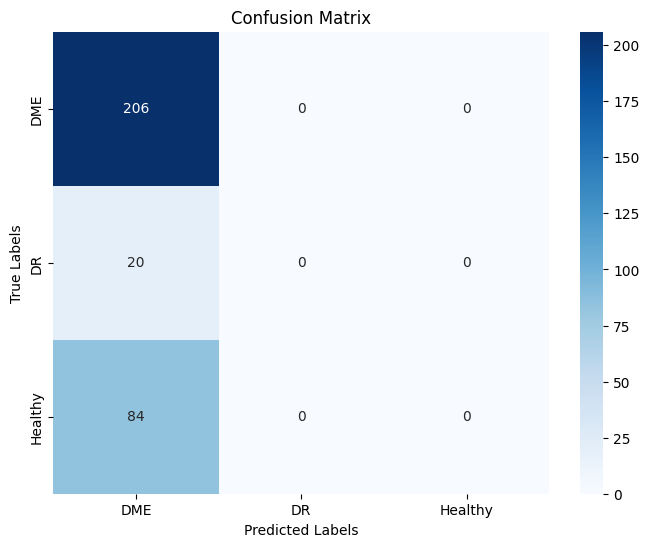

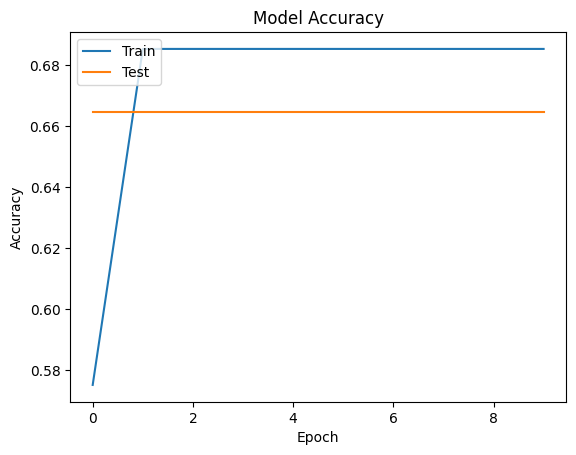

              precision    recall  f1-score   support

         DME       0.66      1.00      0.80       206
          DR       0.00      0.00      0.00        20
     Healthy       0.00      0.00      0.00        84

    accuracy                           0.66       310
   macro avg       0.22      0.33      0.27       310
weighted avg       0.44      0.66      0.53       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/OCT-AND-EYE-FUNDUS-DATASET-main/fundus'
dme_path = os.path.join(dataset_path, 'fundus_DME')
dr_path = os.path.join(dataset_path, 'fundus_DR')
healthy_path = os.path.join(dataset_path, 'fundus_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the multi-scale attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x_before_pooling = Conv2D(512, (3, 3), activation='relu')(x)
attention = GlobalAveragePooling2D()(x_before_pooling)
attention = Dense(256)(attention)
attention = Activation('relu')(attention)
attention = Dense(1)(attention)
attention = Activation('softmax')(attention)
attention = Flatten()(attention)
attention = Multiply()([x_before_pooling, attention])

# Create the model
x = GlobalAveragePooling2D()(attention)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)


Epoch 1/20
39/39 [==============================] - 23s 482ms/step - loss: 1007444544.0000 - accuracy: 0.6375 - val_loss: 0.8179 - val_accuracy: 0.6645
Epoch 2/20
39/39 [==============================] - 17s 443ms/step - loss: 0.8081 - accuracy: 0.6853 - val_loss: 0.8270 - val_accuracy: 0.6645
Epoch 3/20
39/39 [==============================] - 17s 445ms/step - loss: 0.7900 - accuracy: 0.6853 - val_loss: 0.8188 - val_accuracy: 0.6645
Epoch 4/20
39/39 [==============================] - 19s 484ms/step - loss: 0.7879 - accuracy: 0.6853 - val_loss: 0.8657 - val_accuracy: 0.6645
Epoch 5/20
39/39 [==============================] - 18s 450ms/step - loss: 0.7979 - accuracy: 0.6853 - val_loss: 0.8070 - val_accuracy: 0.6645
Epoch 6/20
39/39 [==============================] - 18s 450ms/step - loss: 0.7908 - accuracy: 0.6853 - val_loss: 0.8187 - val_accuracy: 0.6645
Epoch 7/20
39/39 [==============================] - 18s 462ms/step - loss: 0.7841 - accuracy: 0.6853 - val_loss: 0.8269 - val_accurac

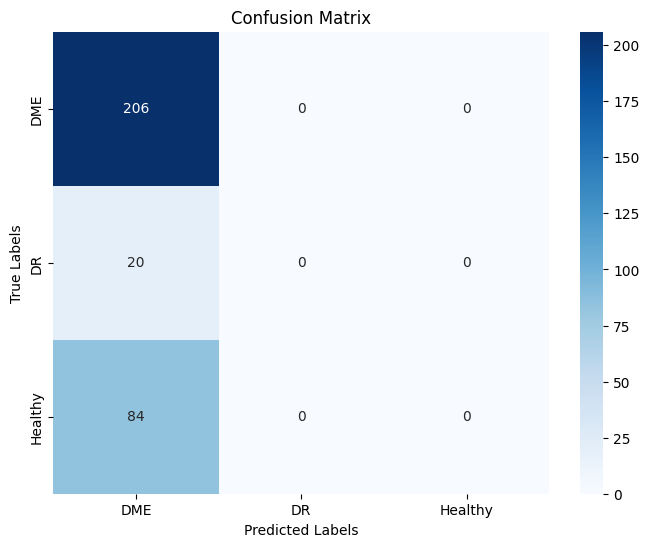

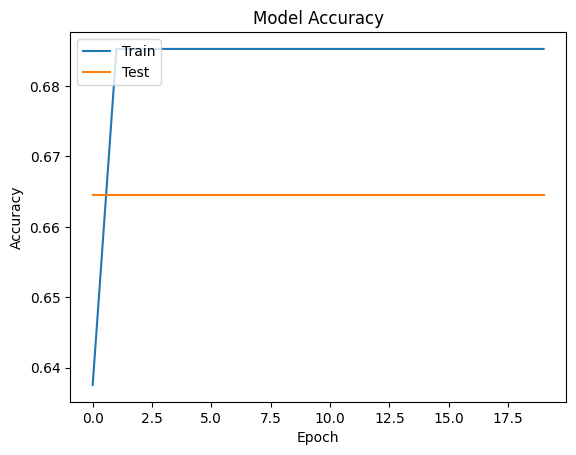

              precision    recall  f1-score   support

         DME       0.66      1.00      0.80       206
          DR       0.00      0.00      0.00        20
     Healthy       0.00      0.00      0.00        84

    accuracy                           0.66       310
   macro avg       0.22      0.33      0.27       310
weighted avg       0.44      0.66      0.53       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/OCT-AND-EYE-FUNDUS-DATASET-main/fundus'
dme_path = os.path.join(dataset_path, 'fundus_DME')
dr_path = os.path.join(dataset_path, 'fundus_DR')
healthy_path = os.path.join(dataset_path, 'fundus_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the multi-scale attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x_before_pooling = Conv2D(512, (3, 3), activation='relu')(x)
attention = GlobalAveragePooling2D()(x_before_pooling)
attention = Dense(256)(attention)
attention = Activation('relu')(attention)
attention = Dense(1)(attention)
attention = Activation('softmax')(attention)
attention = Flatten()(attention)
attention = Multiply()([x_before_pooling, attention])

# Create the model
x = GlobalAveragePooling2D()(attention)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 20
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)


Epoch 1/10
39/39 [==============================] - 34s 532ms/step - loss: 1.9282 - accuracy: 0.6489 - val_loss: 0.7422 - val_accuracy: 0.6645
Epoch 2/10
39/39 [==============================] - 18s 461ms/step - loss: 0.7427 - accuracy: 0.6853 - val_loss: 0.6500 - val_accuracy: 0.6645
Epoch 3/10
39/39 [==============================] - 18s 459ms/step - loss: 0.7457 - accuracy: 0.6853 - val_loss: 0.6700 - val_accuracy: 0.6645
Epoch 4/10
39/39 [==============================] - 20s 515ms/step - loss: 0.6812 - accuracy: 0.6934 - val_loss: 0.5838 - val_accuracy: 0.7226
Epoch 5/10
39/39 [==============================] - 18s 461ms/step - loss: 0.6712 - accuracy: 0.7306 - val_loss: 0.5918 - val_accuracy: 0.7290
Epoch 6/10
39/39 [==============================] - 18s 457ms/step - loss: 0.6607 - accuracy: 0.7516 - val_loss: 0.6508 - val_accuracy: 0.7161
Epoch 7/10
39/39 [==============================] - 19s 497ms/step - loss: 0.6299 - accuracy: 0.7500 - val_loss: 0.5509 - val_accuracy: 0.7935

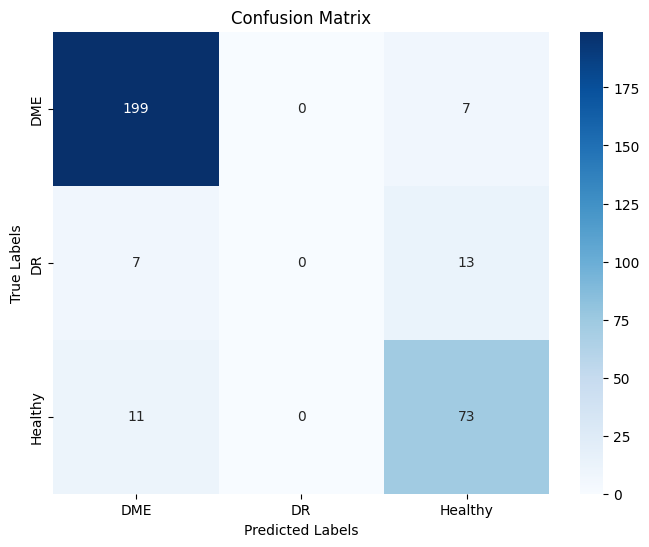

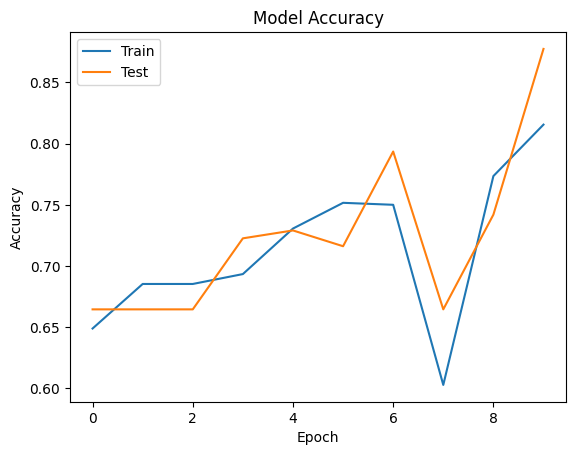

              precision    recall  f1-score   support

         DME       0.92      0.97      0.94       206
          DR       0.00      0.00      0.00        20
     Healthy       0.78      0.87      0.82        84

    accuracy                           0.88       310
   macro avg       0.57      0.61      0.59       310
weighted avg       0.82      0.88      0.85       310



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/OCT-AND-EYE-FUNDUS-DATASET-main/fundus'
dme_path = os.path.join(dataset_path, 'fundus_DME')
dr_path = os.path.join(dataset_path, 'fundus_DR')
healthy_path = os.path.join(dataset_path, 'fundus_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the multi-scale attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x_before_pooling = Conv2D(512, (3, 3), activation='relu')(x)
attention = GlobalAveragePooling2D()(x_before_pooling)
attention = Dense(256)(attention)
attention = Activation('relu')(attention)
attention = Dense(1)(attention)
attention = Activation('softmax')(attention)
attention = Flatten()(attention)
attention = Multiply()([x_before_pooling, attention])

# Create the model
x = GlobalAveragePooling2D()(attention)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=x)


# Compile the model with SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)
